## DeepExplain - Tensorflow example
### MNIST with a 2-layers MLP

In [1]:
import tensorflow as tf

In [2]:
tf.version

<module 'tensorflow._api.v1.version' from '/home/tiagobotari/anaconda3/envs/density-lime3.7/lib/python3.7/site-packages/tensorflow_core/_api/v1/version/__init__.py'>

In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tempfile, sys, os
sys.path.insert(0, os.path.abspath('..'))

from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

# Download and import MNIST data
tmp_dir = tempfile.gettempdir()
mnist = input_data.read_data_sets(tmp_dir, one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/t10k-images-idx3-ubyte.gz
Extracting /tmp/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
# Parameters
learning_rate = 0.005
num_steps = 2000
batch_size = 128

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1], mean=0.0, stddev=0.05)),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], mean=0.0, stddev=0.05)),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes], mean=0.0, stddev=0.05))
}
biases = {
    'b1': tf.Variable(tf.zeros([n_hidden_1])),
    'b2': tf.Variable(tf.zeros([n_hidden_2])),
    'out': tf.Variable(tf.zeros([num_classes]))
}

In [5]:
# Create and train model
def model(x, act=tf.nn.relu):  # < different activation functions lead to different explanations
    layer_1 = act(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    layer_2 = act(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Construct model
logits = model(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Train
def input_transform (x): 
    return (x - 0.5) *  2

sess = tf.Session()

# Run the initializer
sess.run(init)

for step in range(1, num_steps+1):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    batch_x = input_transform(batch_x)
    # Run optimization op (backprop)
    sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
    if step % 100 == 0 or step == 1:
        # Calculate batch loss and accuracy
        loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                             Y: batch_y})
        print("Step " + str(step) + ", Minibatch Loss= " + \
              "{:.4f}".format(loss) + ", Training Accuracy= " + \
              "{:.3f}".format(acc))

print("Done")

# Calculate accuracy for MNIST test images
test_x = input_transform(mnist.test.images)
test_y = mnist.test.labels

print("Test accuracy:", \b
      
    sess.run(accuracy, feed_dict={X: test_x, Y: test_y}))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Step 1, Minibatch Loss= 3.3201, Training Accuracy= 0.234
Step 100, Minibatch Loss= 0.2585, Training Accuracy= 0.945
Step 200, Minibatch Loss= 0.2519, Training Accuracy= 0.906
Step 300, Minibatch Loss= 0.1156, Training Accuracy= 0.977
Step 400, Minibatch Loss= 0.1764, Training Accuracy= 0.969
Step 500, Minibatch Loss= 0.0960, Training Accuracy= 0.984
Step 600, Minibatch Loss= 0.0982, Training Accuracy= 0.961
Step 700, Minibatch Loss= 0.1738, Training Accuracy= 0.961
Step 800, Minibatch Loss= 0.0731, Training Accuracy= 0.969
Step 900, Minibatch Loss= 0.0705, Training Accuracy= 0.992
Step 1000, Minibatch Loss= 0.0710, Training Accuracy= 0.984
Step 1100, Minibatch Loss= 0.0438, Training Accuracy= 0.984
Step 1200, Minibatch Loss= 0.1362, Training Accuracy= 0.945
Step 1300, Minibatch Loss= 0.1725, Traini

In [24]:
y_p = sess.run(logits, feed_dict={X: test_x})
print("Test accuracy:", y_p
    )

Test accuracy: [[ -2.1841807   -0.7510963    0.5862146  ...   7.5861583   -3.4624095
    1.6307843 ]
 [-12.732706     5.089093    10.043096   ...  -0.7878957   -1.63919
   -8.349272  ]
 [ -9.11545      9.259816    -0.24543555 ...  -0.11572336   0.7014799
   -7.484817  ]
 ...
 [-11.809975    -4.496798   -11.425389   ...   3.0373979   -5.059856
    7.0096846 ]
 [  0.40189263  -6.8135896  -10.342329   ...  -4.5325184   -1.2691377
    0.70631695]
 [  6.3758883   -7.7004266   -4.8850465  ... -12.4451      -1.3844955
    0.10645761]]


In [25]:
y_p

array([[ -2.1841807 ,  -0.7510963 ,   0.5862146 , ...,   7.5861583 ,
         -3.4624095 ,   1.6307843 ],
       [-12.732706  ,   5.089093  ,  10.043096  , ...,  -0.7878957 ,
         -1.63919   ,  -8.349272  ],
       [ -9.11545   ,   9.259816  ,  -0.24543555, ...,  -0.11572336,
          0.7014799 ,  -7.484817  ],
       ...,
       [-11.809975  ,  -4.496798  , -11.425389  , ...,   3.0373979 ,
         -5.059856  ,   7.0096846 ],
       [  0.40189263,  -6.8135896 , -10.342329  , ...,  -4.5325184 ,
         -1.2691377 ,   0.70631695],
       [  6.3758883 ,  -7.7004266 ,  -4.8850465 , ..., -12.4451    ,
         -1.3844955 ,   0.10645761]], dtype=float32)

### Use DeepExplain to find attributions for each input pixel

In [26]:
test_idx = 0
xi = test_x[[test_idx]]
yi = test_y[test_idx] 



In [28]:
np.argmax(y_p)

7

In [29]:
y_p

array([[ -3.9971957,  -2.9020133,   1.0721418,  -1.8595235,  -5.3969436,
        -13.206001 , -11.716968 ,  18.761435 ,  -8.941824 ,   2.4497993]],
      dtype=float32)

Done


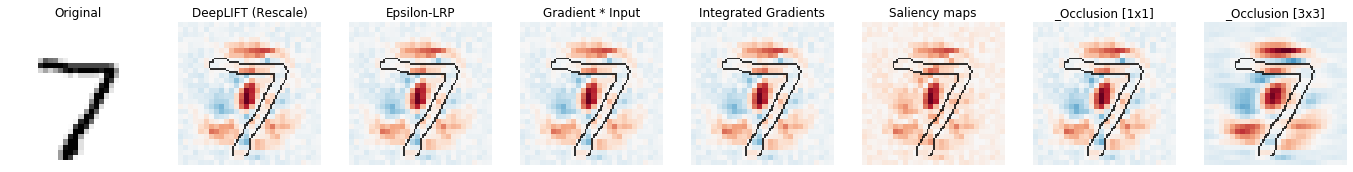

In [75]:
# Import DeepExplain
from deepexplain.tensorflow import DeepExplain
from utils import plot, plt
%matplotlib inline

# Define the input to be tested
test_idx = 0
xi = test_x[[test_idx]]
yi = test_y[test_idx] 
x_explain = xi
# Create a DeepExplain context. 
# IMPORTANT: the network must be created within this context.
# In this example we have trained the network before, so we call `model(X)` to 
# recreate the network graph using the same weights that have been already trained.
with DeepExplain(session=sess) as de:
    logits = model(X)
    # We run `explain()` several time to compare different attribution methods
    attributions = {
        # Gradient-based
        'Saliency maps':        de.explain('saliency', logits * yi, X, xi),
        'Gradient * Input':     de.explain('grad*input', logits * yi, X, xi),
        'Integrated Gradients': de.explain('intgrad', logits * yi, X, xi),
        'Epsilon-LRP':          de.explain('elrp', logits * yi, X, xi),
        'DeepLIFT (Rescale)':   de.explain('deeplift', logits * yi, X, xi),
        #Perturbation-based
        '_Occlusion [1x1]':      de.explain('occlusion', logits * yi, X, xi),
        '_Occlusion [3x3]':      de.explain('occlusion', logits * yi, X, xi, window_shape=(3,))
    }
    print ('Done')

# Plot attributions
n_cols = len(attributions) + 1
fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(3*n_cols, 3))
plot(xi.reshape(28, 28), cmap='Greys', axis=axes[0]).set_title('Original')
for i, method_name in enumerate(sorted(attributions.keys())):
    plot(attributions[method_name].reshape(28,28), xi = xi.reshape(28, 28), axis=axes[1+i]).set_title(method_name)

In [76]:
import os, sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

from m_lime.generators.vae_gen import VAEGen
from m_lime.explainers.explainer import Explainer
from m_lime.explainers.visualizations.visualization import ImagePlot

In [85]:
import torch
def model_predict(x_):
    if isinstance(x_, torch.Tensor):
        x_ = x.detach().cpu().numpy()
    x_ = x_.reshape(-1, 784)
    
    batch_x = input_transform(x_)
    y_p = sess.run(logits, feed_dict={X: batch_x})
    print(y_p)
    return y_p

In [86]:
generator = VAEGen(input_dim=784)
# density.fit(train_loader, epochs=40)
# density.save_manifold('./model_vae_manifold.pth')
generator = generator.load_manifold('./model_vae_manifold.pth')

/home/tiagobotari/anaconda3/envs/density-lime3.7/lib/python3.7/site-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/home/tiagobotari/anaconda3/envs/density-lime3.7/lib/python3.7/site-packages/matplotlib/image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/home/tiagobotari/anaconda3/envs/density-lime3.7/lib/python3.7/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/tiagobotari/anaconda3/envs/density-lime3.7/lib/python3.7/site-packages/matplotlib/image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/home/tiagobotari/anaconda3/envs/density-lime3.7/lib/python3.7/site-packages/numpy/ma/core.py:722: UserWarning: Warning: converting a masked element to nan.
  data =

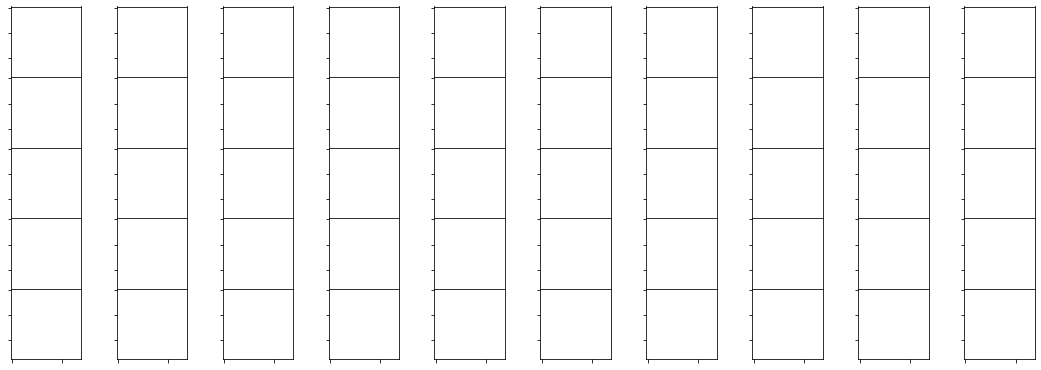

In [93]:
if True:
    x_sample = generator.sample_radius(x_exp=x_explain.reshape(-1, 784), r=1.5, n_samples=15000, random_state=None)
    fig, axis = plt.subplots(5, 10, figsize=(15, 5))
    axis= axis.reshape(-1)
    for ax, img_i in zip(axis, x_sample[:50]):
        x_ = img_i.reshape(28, 28)
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.imshow(x_, interpolation = 'none')
    plt.subplots_adjust(left=0.01, bottom=0.01, right=0.99, top=0.99, wspace=0.01, hspace=0.001)
    plt.show()

In [87]:
def get_explanation(x_explain, model_predict, class_to_explain, local_class, r):
    print("Explanation for: ", class_to_explain)
    print("Probability:", model_predict(x_explain)[0][class_to_explain])
    explain_linear = Explainer(
        model_predict=model_predict, generator=generator,
        local_model=local_class)
    explanation, contra = explain_linear.explain_instance(
        x_explain=x_explain,
        r=r,
        n_samples=1000,
        class_index=class_to_explain,
        tol_importance=0.01,
        tol_error=0.01,
        weight_kernel=None,
        local_mini_batch_max=100,
        scale_data=False
    )
    return explanation, contra
   
def explain(x_explain, model_predict, class_to_explain, local_class, r):
    explanation, contra = get_explanation(
        x_explain, model_predict, class_to_explain, local_class, r)
    fig, axis = ImagePlot.plot_importance_contrafactual(explanation.explain(), contra, class_to_explain)
    plt.savefig(
        f'MNIST_e_c_{class_to_explain}.png', dpi=300, interpolation='none')
    return explanation

In [88]:
local_class = 'SGD'
r = 0.9
explain_linear = None
torch.cuda.empty_cache()

In [89]:
# x_explain = np.loadtxt('five_example_1.np').astype(np.float32).reshape(1, 28, 28)
y_explain = model_predict(x_explain)
y_explain_index = np.argmax(y_explain)
print('Predicted:', y_explain_index, y_explain[0][y_explain_index])
top_three = np.argsort(y_explain)[0][::-1]
print('Top 3 predicted Class', top_three[:3])
y = f'Prediction: {np.argmax(y_explain):}'

[[ -3.9971957  -2.9020133   1.0721418  -1.8595235  -5.3969436 -13.206001
  -11.716968   18.761435   -8.941824    2.4497993]]
Predicted: 7 18.761435
Top 3 predicted Class [7 9 2]


In [90]:
top_three[0]

7

In [91]:
explanation = explain(
    x_explain, model_predict, top_three[0], local_class=local_class, r=r)

Explanation for:  7
[[ -3.9971957  -2.9020133   1.0721418  -1.8595235  -5.3969436 -13.206001
  -11.716968   18.761435   -8.941824    2.4497993]]
Probability: 18.761435
[[ -3.9971957  -2.9020133   1.0721418  -1.8595235  -5.3969436 -13.206001
  -11.716968   18.761435   -8.941824    2.4497993]]
[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [-3.9971986 -2.9020147  1.0721407 ... 18.761444  -8.941826   2.4498017]]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').